# Sketchbook for NLP Project

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

import prepare
import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# default viz size settings
plt.rc('figure', figsize=(9, 7))
plt.rc('font', size=15)

from wordcloud import WordCloud

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/a666/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Acquire

In [3]:
df = pd.read_json('data.json')
df

,repo,language,readme_contents
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w..."
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...
3,beetbox/beets,Python,.. image:: https://img.shields.io/pypi/v/beets...
4,scottschiller/SoundManager2,JavaScript,# SoundManager 2: JavaScript Sound for the Web...
...,...,...,...
1193,kba/awesome-ocr,None,Awesome OCR\n===========\n\n[![Awesome](https:...
1194,adamsitnik/awesome-dot-net-performance,None,# Awesome .NET Performance\nA curated list of ...
1195,jaredthecoder/awesome-vehicle-security,None,# Awesome Vehicle Security [![Awesome](https:/...
1196,rust-embedded/awesome-embedded-rust,None,# Embedded Rust\n\n[![Awesome](https://awesome...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1198 non-null   object
 1   language         1021 non-null   object
 2   readme_contents  1186 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


In [5]:
df[df.language.isna()]

,repo,language,readme_contents
54,Greenstand/Development-Overview,None,# Welcome to Greenstand's Treetracker project\...
68,Data4Democracy/ethics-resources,None,# Global Data Ethics Pledge (GDEP)\n---\n\n## ...
81,jbhuang0604/awesome-computer-vision,None,\n# Awesome Computer Vision: [![Awesome](https...
85,beamandrew/medical-data,None,# Medical Data for Machine Learning\nThis is a...
86,src-d/awesome-machine-learning-on-source-code,None,# Awesome Machine Learning On Source Code [![A...
...,...,...,...
1190,shuaibiyy/awesome-terraform,None,# Awesome Terraform [![Awesome](https://cdn.ra...
1193,kba/awesome-ocr,None,Awesome OCR\n===========\n\n[![Awesome](https:...
1194,adamsitnik/awesome-dot-net-performance,None,# Awesome .NET Performance\nA curated list of ...
1195,jaredthecoder/awesome-vehicle-security,None,# Awesome Vehicle Security [![Awesome](https:/...


## Prepare

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1198 non-null   object
 1   language         1021 non-null   object
 2   readme_contents  1186 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


Prepare the DataFrame with the text article title, original text, stemmed text, lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed. Also drops nulls.

In [7]:
df = prepare.prep_data(df, 'readme_contents')
df

,repo,language,readme_contents,stemmed,lemmatized,clean,stopwords_removed,doc_length,words
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...,codeup setup script setup script for codeup st...,codeup setup script setup script for codeup st...,codeup setup script setup script codeup studen...,113,142,"[codeup, setup, script, setup, script, codeup,..."
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w...",movi applic for thi project we will be build a...,movie application for this project we will be ...,movie application building single page movie a...,386,406,"[movie, application, building, single, page, m..."
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,linux kernel there are sever guid for kernel d...,linux kernel there are several guide for kerne...,linux kernel several guide kernel developer us...,45,65,"[linux, kernel, several, guide, kernel, develo..."
3,beetbox/beets,Python,.. image:: https://img.shields.io/pypi/v/beets...,imag http img shield io pypi v beet svg target...,image http img shield io pypi v beet svg targe...,image img shield io pypi v beet svg target pyp...,274,455,"[image, img, shield, io, pypi, v, beet, svg, t..."
4,scottschiller/SoundManager2,JavaScript,# SoundManager 2: JavaScript Sound for the Web...,soundmanag javascript sound for the web by wra...,soundmanager javascript sound for the web by w...,soundmanager javascript sound web wrapping ext...,339,615,"[soundmanager, javascript, sound, web, wrappin..."
...,...,...,...,...,...,...,...,...,...
990,leochuan/ViewPagerLayoutManager,Java,# ViewPager-LayoutManager [![Download](https:/...,viewpag layoutmanag download http api bintray ...,viewpager layoutmanager download http api bint...,viewpager layoutmanager download api bintray p...,74,257,"[viewpager, layoutmanager, download, api, bint..."
991,arbox/machine-learning-with-ruby,Ruby,"<img title=""Awesome Machine Learning with Ruby...",img titl awesom machin learn with rubi alt awe...,img title awesome machine learning with ruby a...,img title awesome machine learning ruby alt aw...,1068,2480,"[img, title, awesome, machine, learning, ruby,..."
992,BinaryMuse/planetary.js,JavaScript,Planetary.js\n============\n\nPlanetary.js is ...,planetari js planetari js is a javascript libr...,planetary j planetary j is a javascript librar...,planetary j planetary j javascript building aw...,107,214,"[planetary, j, planetary, j, javascript, build..."
993,xinghaochen/awesome-hand-pose-estimation,Python,# Awesome Hand Pose Estimation [![Awesome](htt...,awesom hand pose estim awesom http awesom re b...,awesome hand pose estimation awesome http awes...,awesome hand pose estimation awesome awesome b...,2194,10612,"[awesome, hand, pose, estimation, awesome, awe..."


Summarize data

In [8]:
df.language.value_counts()

Python              301
Java                159
C++                 100
Jupyter Notebook     83
Dart                 77
JavaScript           62
HTML                 43
Ruby                 30
Kotlin               22
C#                   18
Shell                15
Go                   13
C                    12
CSS                   9
TypeScript            8
Lua                   8
PHP                   6
Scala                 5
Objective-C           4
FreeMarker            3
Julia                 3
R                     2
Dockerfile            2
Groovy                2
Swift                 2
Objective-C++         2
ActionScript          2
Rust                  2
Name: language, dtype: int64

Split into train, validate, and test.

In [9]:
train, validate = train_test_split(df, stratify=df.language, test_size=.2, random_state=123)

In [10]:
train.shape

(796, 9)

In [11]:
train.language.value_counts()

Python              241
Java                127
C++                  80
Jupyter Notebook     66
Dart                 62
JavaScript           50
HTML                 34
Ruby                 24
Kotlin               18
C#                   14
Shell                12
Go                   10
C                     9
CSS                   7
TypeScript            6
Lua                   6
PHP                   5
Scala                 4
Objective-C           3
R                     2
Julia                 2
Dockerfile            2
Groovy                2
FreeMarker            2
Swift                 2
Objective-C++         2
ActionScript          2
Rust                  2
Name: language, dtype: int64

In [12]:
validate.shape

(199, 9)

In [13]:
validate.language.value_counts()

Python              60
Java                32
C++                 20
Jupyter Notebook    17
Dart                15
JavaScript          12
HTML                 9
Ruby                 6
C#                   4
Kotlin               4
Shell                3
C                    3
Go                   3
Lua                  2
CSS                  2
TypeScript           2
Scala                1
Objective-C          1
PHP                  1
Julia                1
FreeMarker           1
Name: language, dtype: int64

In [14]:
# create series objects for each top_code_clean that is a string of words joined on spaces to make it 1 continious string  
javascript_words = ' '.join(train[train.language=='JavaScript'].clean)
python_words = ' '.join(train[train.language=='Python'].clean)
ruby_words = ' '.join(train[train.language=='Ruby'].clean)
html_words = ' '.join(train[train.language=='HTML'].clean)
c_plus_plus_words = ' '.join(train[train.language=='C++'].clean)
java_words = ' '.join(train[train.language=='Java'].clean)
all_words = ' '.join(train.clean)

In [35]:
javascript_words

"overview repository advocacy mozilla advocacy mozilla april 2016 three part site homepage advocacy mozilla open web fellow advocacy mozilla open web fellow index html statically generated server build time single index page render requested page client side encrypt campaign advocacy mozilla encrypt html nothing built server instead server generates page requested passed client result page cached server memory first request next request generated getting started clone copy repository using something like git git scm get local version site running need node nodejs higher installed local machine build start local development install run following command bash cp sample env env npm install npm start develop workflow successfully building running server go localhost 8080 localhost 8080 start changing src directory saving change refreshing browser show change outside src require npm start rerun sitemap src page home j encrypt src page encrypt index j open web fellow src page open web fellow

## Explore

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

### What are the most common words in READMEs?

In [15]:
javascript_df = pd.DataFrame(javascript_words.split())
python_df = pd.DataFrame(python_words.split())
ruby_df = pd.DataFrame(ruby_words.split())
html_df = pd.DataFrame(html_words.split())
c_plus_plus_df = pd.DataFrame(c_plus_plus_words.split())
java_df = pd.DataFrame(java_words.split())
all_words_df = pd.DataFrame(all_words.split())

In [16]:
all_words_df

,0
0,tensorflow
1,program
2,tutorial
3,repository
4,contain
...,...
612676,lee
612677,dongjunlee
612678,humanbrain
612679,djlee


In [17]:
javascript_freq = javascript_df.value_counts()
python_freq = python_df.value_counts()
ruby_freq = ruby_df.value_counts()
html_freq = html_df.value_counts()
c_plus_plus_freq = c_plus_plus_df.value_counts()
java_freq = java_df.value_counts()
all_freq = all_words_df.value_counts()

all_freq.head()

image     4401
master    3930
data      3708
img       3579
io        3509
dtype: int64

In [18]:
word_counts = (pd.concat([all_freq, javascript_freq, python_freq, ruby_freq, html_freq, c_plus_plus_freq, java_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'ruby', 'html', 'c_plus_plus', 'java'], axis=1, inplace=False) 
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,javascript,python,ruby,html,c_plus_plus,java
0,,,,,,,
',454,104,225,10,7,2,23
0,198,14,78,8,1,6,21
00,96,6,73,2,1,3,7
000,63,2,38,0,3,1,1
0000,5,0,1,1,0,0,0


### What are the most frequently occuring words?

In [19]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,python,ruby,html,c_plus_plus,java
0,,,,,,,
image,4401,111,1961,4,90,165,233
master,3930,179,1345,18,51,270,383
data,3708,329,2037,61,134,74,119
img,3579,103,1317,17,80,218,493
io,3509,231,1590,28,54,235,393
model,3326,65,2203,48,2,133,32
python,3162,34,2198,2,29,178,22
learning,3074,29,1912,93,11,107,33
src,2795,248,839,20,12,128,363


### Are there any words that uniquely identify a language of a project?

In [20]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').tail(3),
           word_counts[word_counts.python == 0].sort_values(by='javascript').tail(3),
           word_counts[word_counts.ruby == 0].sort_values(by='html').tail(3),
           word_counts[word_counts.html == 0].sort_values(by='ruby').tail(3),
           word_counts[word_counts.c_plus_plus == 0].sort_values(by='java').tail(3),
           word_counts[word_counts.java == 0].sort_values(by='c_plus_plus').tail(3)])

,all,javascript,python,ruby,html,c_plus_plus,java
0,,,,,,,
donnemartin,332,0,331,0,0,0,0
batch,433,0,350,1,0,11,4
imgaug,422,0,422,0,0,0,0
mxflutter,95,95,0,0,0,0,0
ganache,96,96,0,0,0,0,0
eslint,217,211,0,0,0,0,4
scene,203,0,28,0,101,8,1
weixin,149,0,11,0,102,0,0
qq,229,3,18,0,104,0,22


### Visualization

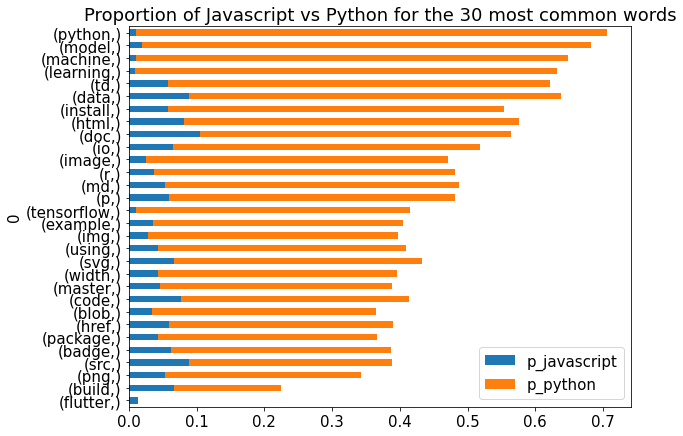

In [21]:
explore.js_v_python_props(word_counts)

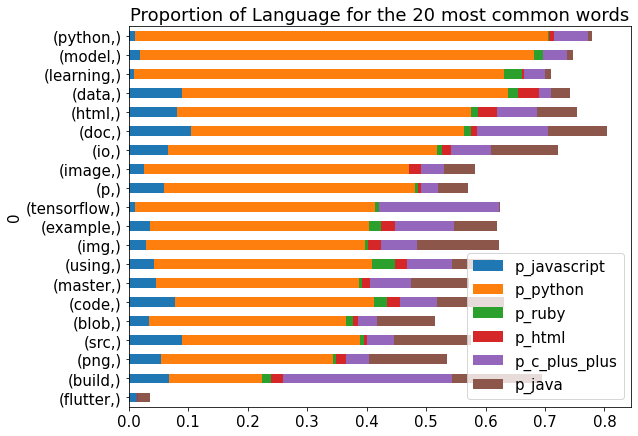

In [22]:
explore.most_common_words_props(word_counts)

### Which words show up the most in each language versus all words?

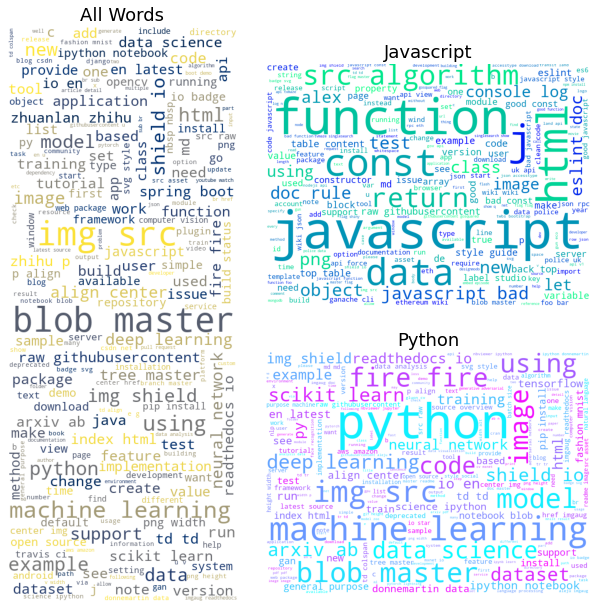

In [23]:
explore.word_cloud_1(all_words, javascript_words, python_words)

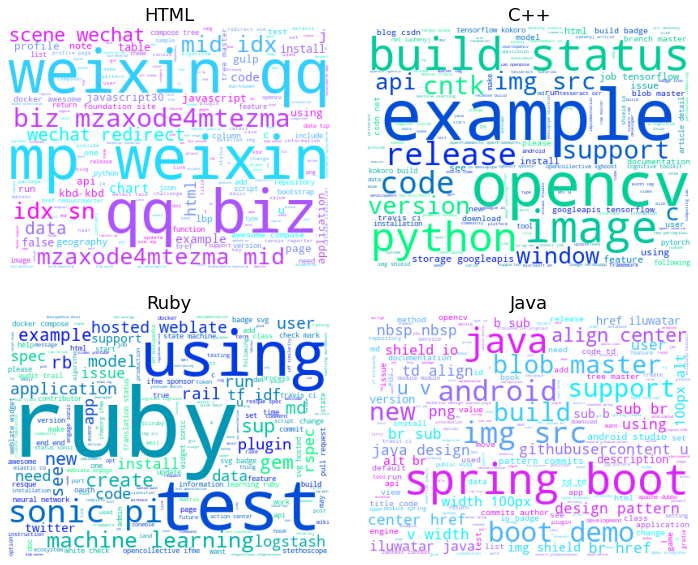

In [24]:
explore.word_cloud_2(html_words, ruby_words, c_plus_plus_words, java_words)

In [25]:
# Extra words to add: ['github', 'project', 'name', 'library']

### Bigrams

In [36]:
top_10_javascript_bigrams = explore.get_bigrams(javascript_words)

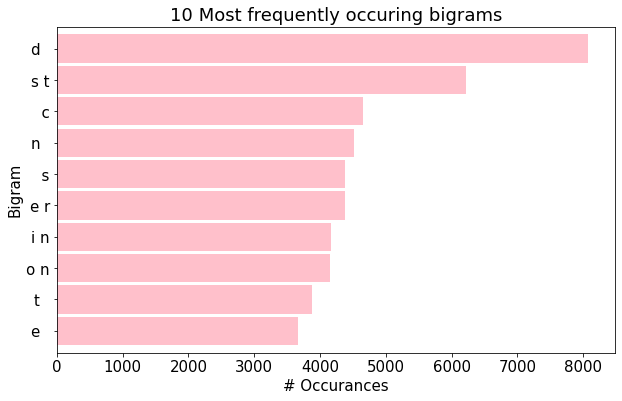

In [37]:
explore.viz_bigrams(top_10_javascript_bigrams)

## Model

In [28]:
from pprint import pprint

## Conclusions and Takeaways

## Add repos

In [29]:
add_repos_df = pd.read_csv("Github_data.csv")
add_repos_df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,...,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,...,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,...,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,...,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,...,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,...,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [30]:
df1 = add_repos_df.user
df2 = add_repos_df.name
df1.head()

0          keras-team
1        scikit-learn
2             jakevdp
3    CamDavidsonPilon
4            abhat222
Name: user, dtype: object

In [31]:
add_repos_df = pd.concat([df1 + '/' + df2], axis=1, sort=False)
add_repos_df.head()

,0
0,keras-team/keras
1,scikit-learn/scikit-learn
2,jakevdp/PythonDataScienceHandbook
3,CamDavidsonPilon/Probabilistic-Programming-and...
4,abhat222/Data-Science--Cheat-Sheet


In [32]:
add_repos_list = add_repos_df[0].tolist()
add_repos_list

['keras-team/keras',
 'scikit-learn/scikit-learn',
 'jakevdp/PythonDataScienceHandbook',
 'CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers',
 'abhat222/Data-Science--Cheat-Sheet',
 'donnemartin/data-science-ipython-notebooks',
 'explosion/spaCy',
 'eriklindernoren/ML-From-Scratch',
 'datasciencemasters/go',
 'ipython/ipython',
 'virgili0/Virgilio',
 'academic/awesome-datascience',
 'plotly/dash',
 'ray-project/ray',
 'RaRe-Technologies/gensim',
 'rasbt/python-machine-learning-book',
 'afshinea/stanford-cs-229-machine-learning',
 'hangtwenty/dive-into-machine-learning',
 'bharathgs/Awesome-pytorch-list',
 'tflearn/tflearn',
 'onurakpolat/awesome-bigdata',
 'allenai/allennlp',
 'php-ai/php-ml',
 'streamlit/streamlit',
 'ricklamers/gridstudio',
 'lexfridman/mit-deep-learning',
 'ossu/data-science',
 'OpenRefine/OpenRefine',
 'microsoft/recommenders',
 'EpistasisLab/tpot',
 'FavioVazquez/ds-cheatsheets',
 'Yorko/mlcourse.ai',
 'microsoft/nni',
 'rasbt/python-mac